In [1]:
import cv2
import matplotlib. pyplot as plt

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
# mobile net is very large  and very deep cnn algorithum
#coco is the data set 
frozen_model='frozen_inference_graph.pb'

In [3]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
ClassLabels = []  # Initialize an empty list to store the class labels
file_name = 'labels.txt'

# Open the file and read its contents
with open(file_name, 'rt') as fpt:
    # Read the contents of the file, strip any trailing newline characters, and split the lines
    ClassLabels = fpt.read().rstrip('\n').split('\n')

# Now, ClassLabels should contain the list of class labels read from the file


In [5]:
print(ClassLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'building', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
 model.setInputSize(320,320)
 model.setInputScale(1.0/127.5)
 model.setInputMean((127.5,127,5,127.5))
 model.setInputSwapRB(True)

< cv2.dnn.Model 000001B53E79B6D0>

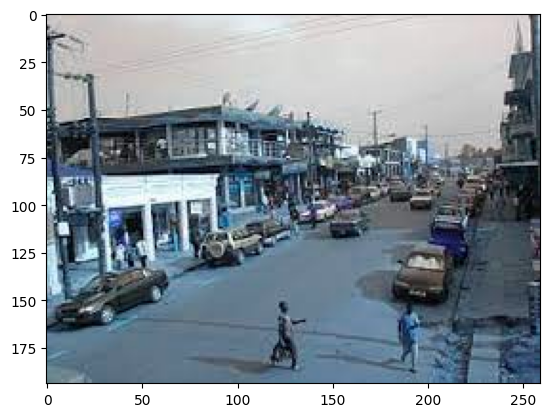

In [7]:
img =cv2.imread('download (2).jpg')
plt.imshow(img)

In [8]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)


In [9]:
print(ClassIndex)

[1 3 3 3]


In [10]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    x, y, w, h = boxes
    cv2.rectangle(img, (x, y), (x + w, y + h), (225, 0, 0), 2)
    cv2.putText(img, ClassLabels[ClassInd - 1], (x + 10, y + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)


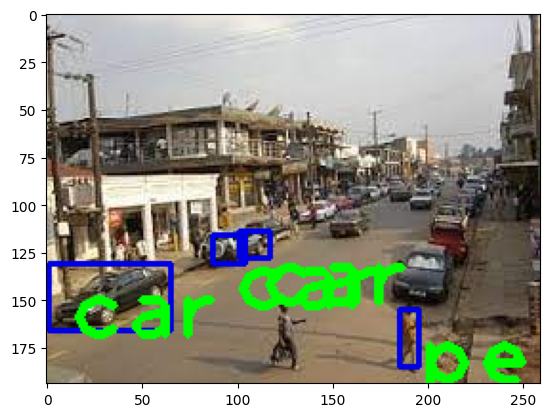

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [20]:
import cv2

cap = cv2.VideoCapture('pexels_videos_2880 (1080p).mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            x, y, w, h = box
            if ClassInd <= 80:  # Assuming 80 is the maximum class index
                cv2.rectangle(frame, (x, y), (x + w, y + h), (225, 0, 0), 2)
                cv2.putText(frame, ClassLabels[ClassInd - 1], (x + 10, y + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('object detection by Nipuna', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



[3]
[3 8 1]
[3 8]
[3 8]
[3 8 1]
[3 8]
[3 1 8]
[3 8 1]
[3 8 1]
[3 1 8]
[3 1 8]
[ 3  1 31]
[1 3]
[3 1]
[3 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[1 3 1]
[1 3 1]
[1 3 1]
[ 1  3  1 11]
[3 1 1]
[ 3  1  1 11]
[ 3  1 11  1]
[ 3 11  1]
[ 1  3 11  1]
[ 1  3  1 11]
[ 1  1  3  3 11]
[ 1  3  1  3 11]
[1 3 1]
[ 1  1 11]
[1 1]
[ 1  1 11]
[ 1 11  1  1]
[1 1 1]
[11  1  1]
[ 1  1 11  3]
[1 1]
[1 3 1]
[ 1 11  3]
[ 3  1  1 11]
[ 3 11  1  1]
[ 3 11  1  1]
[3 1]
[3 1]
[ 3  1 11]
[ 3 11  1]
[ 3 11  1]
[ 3 11  1]
[ 3 11]
[ 3 11  8]
[ 3 11  8  1]
[ 3  8 11]
[ 3  8 11]
[ 3  8 11]
[ 3  8 11]
[ 3 11  8]
[3 8]
[3 8]
[ 3  8 11]
[ 3 11  8]
[ 3 11  8]
[ 3 11  8]
[ 3 11]
[3]
[ 3 11]
[ 3 11]
[ 3  3 11]
[ 3 11  3]
[ 3 11]
[ 3 11  3]
[ 3 11  3]
[ 3  3 11]
[ 3  3 11]
[ 3  3 11]
[ 3  3 11]
[ 3  3 11]
[ 3  3 11]
[ 3  3 11]
[ 3  3 11]
[ 3  3 11  1]
[ 3  3 11  1]
[ 3  8  3 11]
[ 3 11  8]
[ 3 11]
[ 3  3 11]
[ 3  8 11]
[ 3  8  3 11]
[3 8]
[3 8]
[ 3  8 11]
[ 3  8 11]
[ 3  8 11]
[ 3  8 11]
[ 3  8 11]


KeyboardInterrupt: 